<a href="https://colab.research.google.com/github/KayalvizhiT513/MobileNet-FeatureExtraction-HumanDetection/blob/main/Training_Mobile_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# importing library to handle time
import time

# importing libray to handle status bars
from tqdm.notebook import tqdm

# import libray to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# importing library to deal with numeric arrays
import numpy as np

# importing library to process images
import cv2

# importing deep learning library
import tensorflow as tf

# importing library for preprocessing
from sklearn.preprocessing import LabelEncoder

# importing library for plotting
import matplotlib.pyplot as plt

In [10]:
# defining a function to resize images
def img_prep(features, output, dims):

    img_data = []
    labels = []

    for enum, imagePath in tqdm(enumerate(features)):

        try:
            counter = 0
            img=cv2.imread(imagePath)
            img=cv2.resize(img, (dims[1], dims[0]))

        except Exception as e:

            counter = 1

        if counter==0:

            label = output[enum]
            labels.append(label)

            img_data.append(img)

    return img_data, labels

In [11]:
import glob

folder_path = "/content/drive/MyDrive/NegativeSamples1000"
neg_patch = glob.glob(folder_path + "/*.[jpJP]*g")  # Matches .jpg, .jpeg, .png

print(neg_patch)


['/content/drive/MyDrive/NegativeSamples1000/tile_473_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_473_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_474_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_475_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_475_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_476_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_479_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_479_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_480_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_480_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_482_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_482_2.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_482_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_483_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_483_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_484_1.jpg', '/content/drive/MyDrive

In [12]:
!git clone https://github.com/KayalvizhiT513/MobileNet-FeatureExtraction-HumanDetection.git


fatal: destination path 'MobileNet-FeatureExtraction-HumanDetection' already exists and is not an empty directory.


In [13]:
image_paths = glob.glob("/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/*.[jpJP]*g")
print(image_paths)
neg_patch.extend(image_paths)

['/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_409_1.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_250_2.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_275_3.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_365_3.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_72_1.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_86_1.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_275_1.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_59_3.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_200_2.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_413_1.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_388_4.jpg', '/content/Mo

In [14]:
folder_path = "/content/drive/MyDrive/pos patches"
pos_patch = glob.glob(folder_path + "/*.[jpJP]*g")
print(pos_patch)

['/content/drive/MyDrive/pos patches/15.jpg', '/content/drive/MyDrive/pos patches/79.jpg', '/content/drive/MyDrive/pos patches/26.jpg', '/content/drive/MyDrive/pos patches/59.jpg', '/content/drive/MyDrive/pos patches/41.jpg', '/content/drive/MyDrive/pos patches/66.jpg', '/content/drive/MyDrive/pos patches/18.jpg', '/content/drive/MyDrive/pos patches/5.jpg', '/content/drive/MyDrive/pos patches/91.jpg', '/content/drive/MyDrive/pos patches/80.jpg', '/content/drive/MyDrive/pos patches/29.jpg', '/content/drive/MyDrive/pos patches/17.jpg', '/content/drive/MyDrive/pos patches/39.jpg', '/content/drive/MyDrive/pos patches/67.jpg', '/content/drive/MyDrive/pos patches/71.jpg', '/content/drive/MyDrive/pos patches/36.jpg', '/content/drive/MyDrive/pos patches/40.jpg', '/content/drive/MyDrive/pos patches/33.jpg', '/content/drive/MyDrive/pos patches/63.jpg', '/content/drive/MyDrive/pos patches/72.jpg', '/content/drive/MyDrive/pos patches/64.jpg', '/content/drive/MyDrive/pos patches/53.jpg', '/content/

In [15]:
from os import posix_spawn
# preprocessing training and validation sets
IMAGE_DIMS = (160, 160, 3)

input_images = pos_patch + neg_patch
y_names = [1]*len(pos_patch) + [0]*len(neg_patch)
X, y = img_prep(input_images, y_names, IMAGE_DIMS)

0it [00:00, ?it/s]

In [16]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize pixel values
X = X / 255.0

# Feature extraction using MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMAGE_DIMS,
                                               include_top=False,
                                               weights='imagenet',
                                               pooling='avg')  # global average pooling

# Extract features
features = base_model.predict(X, verbose=1)

# Train SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 47s 651ms/step
Accuracy: 0.9753363228699552
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       236
           1       0.98      0.97      0.97       210

    accuracy                           0.98       446
   macro avg       0.98      0.97      0.98       446
weighted avg       0.98      0.98      0.98       446



In [17]:
def detect_blocks_in_image(image_path, clf, feature_extractor, block_rows=4, block_cols=4, image_dims=(160, 160)):
    # Load image
    img = cv2.imread(image_path)
    original_img = img.copy()
    height, width, _ = img.shape

    block_h = height // block_rows
    block_w = width // block_cols

    for i in range(block_rows):
        for j in range(block_cols):
            # Crop the block
            y1, y2 = i * block_h, (i + 1) * block_h
            x1, x2 = j * block_w, (j + 1) * block_w
            block = img[y1:y2, x1:x2]

            # Resize block to model input size
            resized_block = cv2.resize(block, (image_dims[1], image_dims[0]))
            normalized_block = resized_block.astype("float32") / 255.0
            input_block = np.expand_dims(normalized_block, axis=0)

            # Extract features
            features = feature_extractor.predict(input_block, verbose=0)

            # Predict using SVM
            pred = clf.predict(features)[0]

            # Draw bounding box if positive class
            if pred == 1:
                cv2.rectangle(original_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show result
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Blocks")
    plt.show()


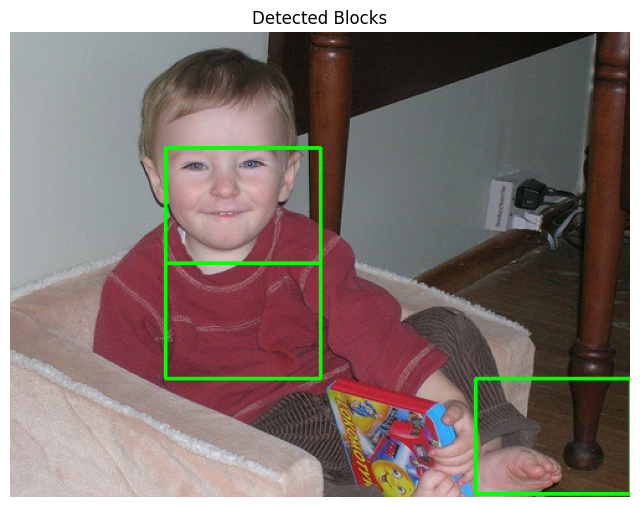

In [18]:
detect_blocks_in_image('/content/image (96).jpg', clf, base_model, block_rows=4, block_cols=4, image_dims=(160, 160))

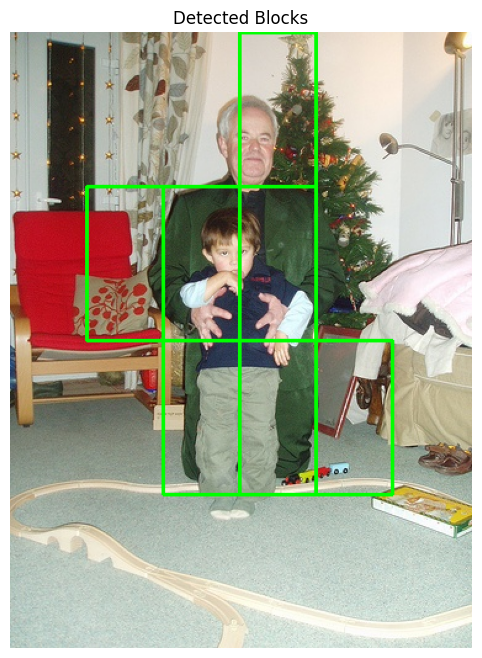

In [27]:
detect_blocks_in_image('/content/image (27).jpg', clf, base_model, block_rows=4, block_cols=6, image_dims=(160, 160))

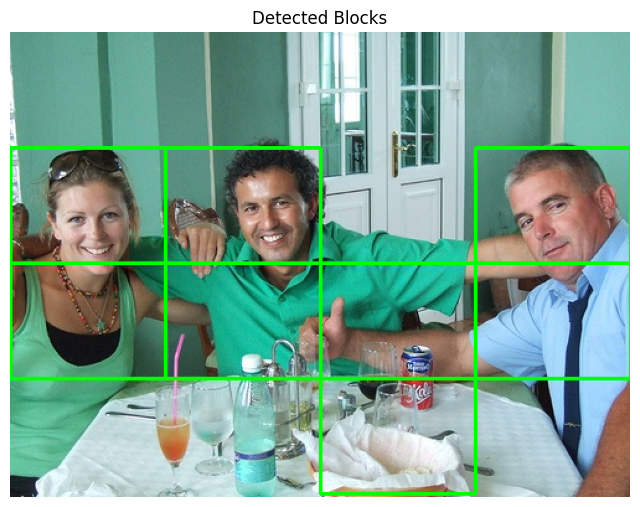

In [20]:
detect_blocks_in_image('/content/image (47).jpg', clf, base_model, block_rows=4, block_cols=4, image_dims=(160, 160))

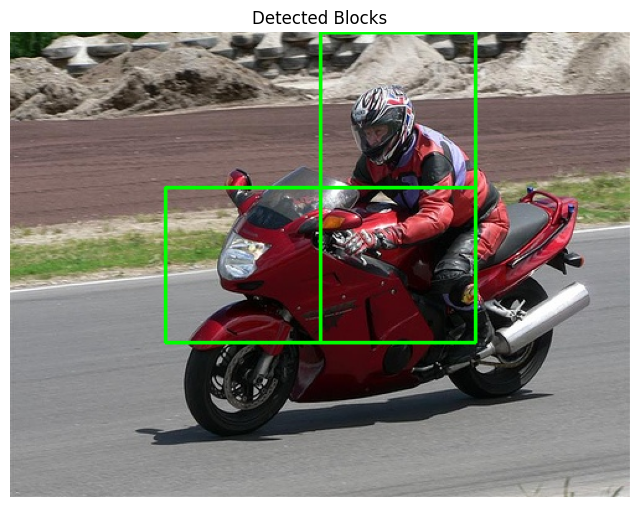

In [29]:
detect_blocks_in_image('/content/image (81).jpg', clf, base_model, block_rows=3, block_cols=4, image_dims=(160, 160))